In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Detalle_cliente = pd.read_csv("/content/Detalle_cliente.csv", sep=';')
Detalle_tx = pd.read_csv("/content/Detalle_tx.csv",sep=';')
Detalle = pd.merge(Detalle_cliente, Detalle_tx, right_index=True, left_index=True)
Detalle = Detalle.drop(columns='Id_tx_x').rename(columns={'Id_tx_y':'Id_tx'})
Detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id_cliente      2500 non-null   int64 
 1   fecha_efectiva  2500 non-null   int64 
 2   Id_tx           2500 non-null   int64 
 3   clase           2500 non-null   object
 4   valor           2500 non-null   object
dtypes: int64(3), object(2)
memory usage: 97.8+ KB


In [ ]:
Detalle['valor'] = Detalle['valor'].str.replace(",",".")
Detalle['valor'] = Detalle['valor'].astype('float')
Detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id_cliente      2500 non-null   int64  
 1   fecha_efectiva  2500 non-null   int64  
 2   Id_tx           2500 non-null   int64  
 3   clase           2500 non-null   object 
 4   valor           2500 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 97.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
Detalle['clase'] = LabelEncoder().fit_transform(Detalle["clase"])
Detalle

,Id_cliente,fecha_efectiva,Id_tx,clase,valor
0,136,20210303,6869,1,3495240.0
1,116,20201129,4355,1,475800.0
2,119,20200929,5416,1,115775.0
3,121,20210222,3249,1,1579898.0
4,152,20200930,2774,1,84077.0
...,...,...,...,...,...
2495,119,20210221,3884,1,68500.0
2496,152,20201115,8254,1,218350.0
2497,125,20201102,9456,1,247089.0
2498,126,20201018,6523,1,51000.0


In [ ]:
prueba = Detalle.groupby(["Id_cliente","clase"])["valor"].sum()
prueba = prueba.reset_index()
prueba = prueba.rename(columns= {'valor':'Consumo'})
Consumo = pd.merge(Detalle, prueba, how='left', on=['Id_cliente','clase']).sort_values('fecha_efectiva')
Consumo = Consumo.drop(columns=(['valor', 'Id_tx']))
Consumo = Consumo.drop_duplicates(subset = ['Id_cliente','clase'], keep = 'last').reset_index(drop=True)
Consumo
# Consumo.to_excel('Consumo.xlsx', index = False)

,Id_cliente,fecha_efectiva,clase,Consumo
0,92,20200906,0,200000.00
1,158,20200908,0,800000.00
2,159,20200929,0,800000.00
3,152,20200930,0,900000.00
4,146,20201023,0,600000.00
...,...,...,...,...
121,150,20210308,1,1578858.00
122,129,20210308,1,35390363.34
123,126,20210308,1,23195182.09
124,127,20210308,0,11396000.00


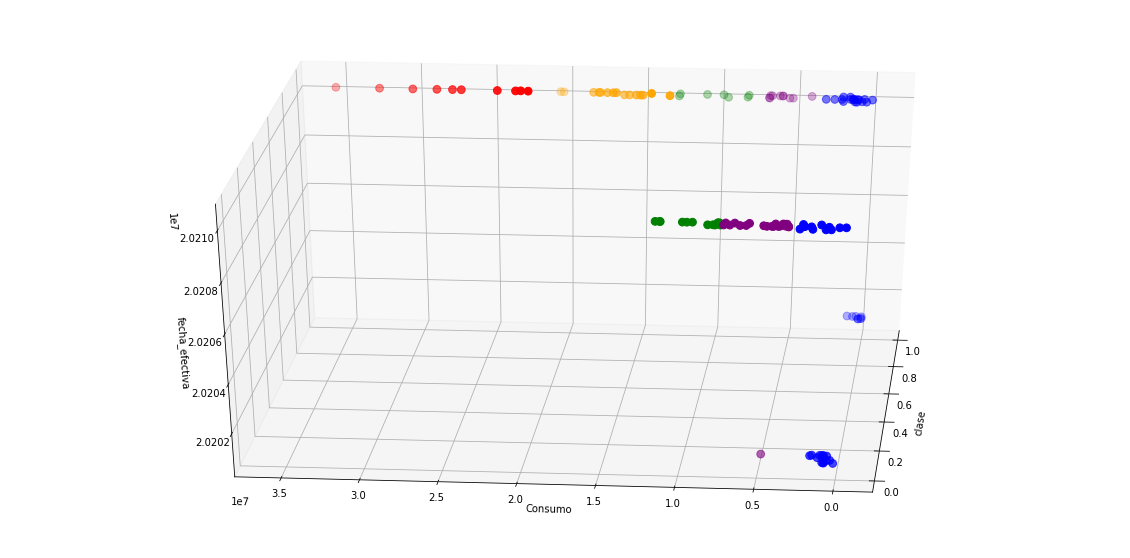

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
km = KMeans(n_clusters=5)
clusters = km.fit_predict(Consumo.iloc[:,1:])
Consumo["label"] = clusters
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Consumo.clase[Consumo.label == 0], Consumo["Consumo"][Consumo.label == 0], Consumo["fecha_efectiva"][Consumo.label == 0], c='blue', s=60)
ax.scatter(Consumo.clase[Consumo.label == 1], Consumo["Consumo"][Consumo.label == 1], Consumo["fecha_efectiva"][Consumo.label == 1], c='red', s=60)
ax.scatter(Consumo.clase[Consumo.label == 2], Consumo["Consumo"][Consumo.label == 2], Consumo["fecha_efectiva"][Consumo.label == 2], c='green', s=60)
ax.scatter(Consumo.clase[Consumo.label == 3], Consumo["Consumo"][Consumo.label == 3], Consumo["fecha_efectiva"][Consumo.label == 3], c='orange', s=60)
ax.scatter(Consumo.clase[Consumo.label == 4], Consumo["Consumo"][Consumo.label == 4], Consumo["fecha_efectiva"][Consumo.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("clase")
plt.ylabel("Consumo")
ax.set_zlabel('fecha_efectiva')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


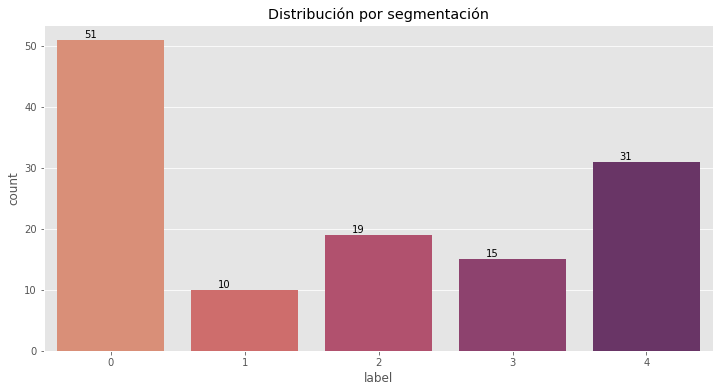

In [ ]:
plt.style.use('ggplot')
Frecuencia = Consumo.groupby('label').sum()
plt.figure(figsize=(12,6))
graf = sns.countplot(Consumo['label'],palette='flare')
plt.title('Distribución por segmentación')
for p in graf.patches:
    graf.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='bottom', color='black', size=10)
plt.show()

In [ ]:
Consumo.to_csv('Segmentacion_Clientes.csv', index=False)
Consumo.to_excel('Segmentacion_Clientes.xlsx', index=False)